In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_excel("advertising_sales_data.xlsx")
df.head()

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9


In [ ]:
df = df.drop(columns = ['Campaign'])

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


TV           0
Radio        2
Newspaper    0
Sales        0
dtype: int64

In [ ]:
# Fill missing values with the mean of the respective columns
df.fillna(df.mean(), inplace=True)

# Verify that there are no missing values left
missing_values_after = df.isnull().sum()
missing_values_after


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
average_tv_spend = df['TV'].mean()
print(f"The average amount spent on TV advertising is: {average_tv_spend}")


The average amount spent on TV advertising is: 147.0425


In [ ]:
correlation_radio_sales = df['Radio'].corr(df['Sales'])
print(f"The correlation between radio advertising expenditure and product sales is: {correlation_radio_sales}")


The correlation between radio advertising expenditure and product sales is: 0.3496507429302875


In [ ]:
correlations = df.corr()['Sales'].drop('Sales')
most_impactful_medium = correlations.idxmax()
most_impactful_medium


'TV'

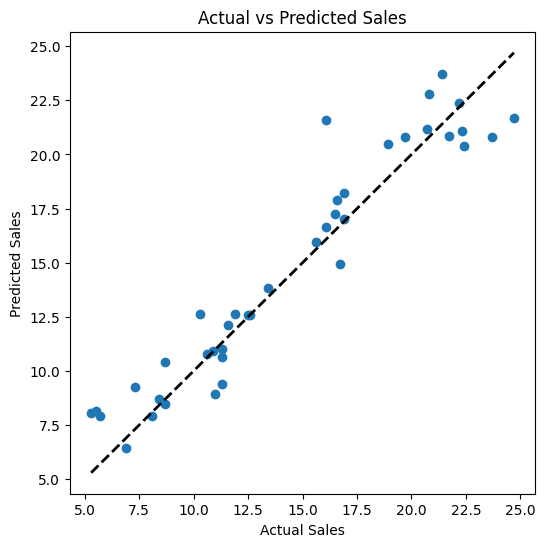

In [ ]:
# Prepare the data
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plot the results
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [ ]:
new_data = [[200,40,50]]
predicted_sales = model.predict(new_data)
predicted_sales[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


19.871049209206635

Scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the normalized data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model on normalized data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train_scaled)

# Make predictions
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Calculate the performance
mse = mean_squared_error(y_test, y_pred)
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
mse, mse_scaled

(2.9074318865000555, 2.907431886500056)

In [ ]:
# Prepare the data with only Radio and Newspaper
X_rn = df[['Radio', 'Newspaper']]

# Split the data
X_train_rn, X_test_rn, y_train_rn, y_test_rn = train_test_split(X_rn, y, test_size=0.2, random_state=42)

# Train the model
model_rn = LinearRegression()
model_rn.fit(X_train_rn, y_train_rn)

# Make predictions
y_pred_rn = model_rn.predict(X_test_rn)

# Calculate the performance
mse_rn = mean_squared_error(y_test_rn, y_pred_rn)
mse_rn


27.50240015808231